In [20]:
import random
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd
import math

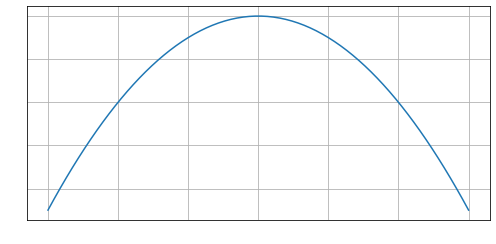

Random pick: 2


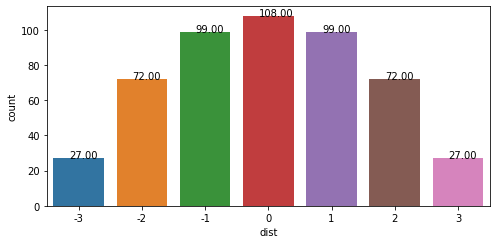

In [92]:
def random_naive_dist(min_value, max_value, step, formula = lambda x:x, seeds = 1000, round_to_step = True):
    # set max for rounded output to have an extra bin for the last one
    max_value = max_value + step if round_to_step else max_value
    window_size = float(max_value) - float(min_value)
    max_counts = {}
    bin_counts = {}
    rand_list = []
    # plot dirstribution
    xpts = np.linspace(min_value, max_value - step, round(window_size*10))
    plt.plot(xpts, formula(xpts))
    plt.tick_params(color='white',labelcolor='white')
    ax = plt.gca()
    ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(step))
    plt.grid()
    plt.show()
    # loop in bracket
    for i in np.arange(min_value, max_value, step):
        max_counts[i] = formula(i)
        bin_counts[i] = 0
    scaler = round(seeds/sum(max_counts.values()))
    max_counts.update((x, round(y * scaler)) for x, y in max_counts.items())
    # loop in seeds
    for i in range(sum(max_counts.values())):
        rand = 0 if round_to_step else random.random()
        for i in np.arange(min_value, max_value, step):
            new_rand = (i) + ((rand) * (step))
            if bin_counts[i] < max_counts[i]:
                rand_list.append(new_rand)
                bin_counts[i] += 1
                break
    list_copy = list(rand_list)
    random.shuffle(list_copy)
    return list_copy

random_list = random_naive_dist(min_value = -3, max_value = 3, step = 1, formula = lambda x:12-(x**2), seeds = 500)
print('Random pick: {}'.format(random_list[0]))

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
df = pd.DataFrame(dict(dist=np.array(a)))
ax = sns.countplot(x="dist", data=df)
for p in ax.patches:
   ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()